In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = "TRUE"

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255

In [3]:
# 생성자 모델을 만듭니다.
autoencoder = models.Sequential()

# 인코딩 부분입니다.
autoencoder.add(layers.Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu')) #1+2k=7 0~3

# 디코딩 부분이 이어집니다. 
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조를 확인해 봅니다.

In [4]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

Epoch 1/50
469/469 [==============================] - 81s 171ms/step - loss: 0.2216 - val_loss: 0.1371
Epoch 2/50
469/469 [==============================] - 79s 167ms/step - loss: 0.1274 - val_loss: 0.1193
Epoch 3/50
469/469 [==============================] - 79s 169ms/step - loss: 0.1155 - val_loss: 0.1107
Epoch 4/50
469/469 [==============================] - 79s 169ms/step - loss: 0.1097 - val_loss: 0.1062
Epoch 5/50
469/469 [==============================] - 80s 171ms/step - loss: 0.1062 - val_loss: 0.1034
Epoch 6/50
469/469 [==============================] - 80s 170ms/step - loss: 0.1039 - val_loss: 0.1013
Epoch 7/50
469/469 [==============================] - 81s 172ms/step - loss: 0.1019 - val_loss: 0.0997
Epoch 8/50
469/469 [==============================] - 80s 171ms/step - loss: 0.1005 - val_loss: 0.0982
Epoch 9/50
469/469 [==============================] - 80s 171ms/step - loss: 0.0991 - val_loss: 0.0973
Epoch 10/50
469/469 [==============================] - 79s 169ms/step - l

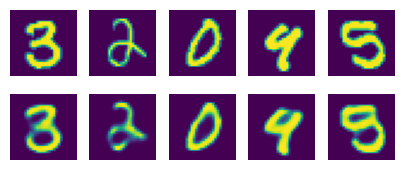

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)                     # 앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))                         # 출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):       # 랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) #i 0~4 7칸의 1
   #plt.subplot: nrows, ncols, index
   plt.imshow(X_test[image_idx].reshape(28, 28))   # 테스트할 이미지를 먼저 그대로 보여줍니다. #그림
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1) #8
   plt.imshow(ae_imgs[image_idx].reshape(28, 28)) # 오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()